In [1]:
import networkx as nx
import numpy as np; np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from simulate import ODE_simulate, GILL_simulate
from plot_module import plot_ODE, plot_gillespie, plot_network
from sim_param_from_network import names_from_network, gillespie_reaction_dict_from_network, dataframes_from_network, ODE_from_network
from network_generate import linear_network

In [2]:
MAX_T = 5000
TIME_POINTS = np.linspace(0, MAX_T, 500)

## Define network topology and numeric parameters

In [3]:
# G = nx.DiGraph()

# G.add_node('N1', birth_type=2, c_b = 0.1, birth_rate = 0.07, nss=200, delta = 0.5, death_rate = 0.07,)
# G.add_node('N2', birth_type=1, c_b = 0.1, birth_rate = 0.07, nss=200, delta = 0.5, death_rate = 0.07,)
# G.add_node('N3', birth_type=1, c_b = 0.1, birth_rate = 0.07, nss=200, delta = 0.5, death_rate = 0.07,)
# G.add_node('N4', birth_type=1, c_b = 0.1, birth_rate = 0.07, nss=200, delta = 0.5, death_rate = 0.07,)
# G.add_node('N5', birth_type=1, c_b = 0.1, birth_rate = 0.07, nss=200, delta = 0.5, death_rate = 0.07,)

# G.add_edge('N1', 'N2', rate=0.15)
# G.add_edge('N2', 'N3', rate=0.15)
# G.add_edge('N3', 'N4', rate=0.15)
# G.add_edge('N4', 'N5', rate=0.15)
# G.add_edge('N5', 'N1', rate=0.15)

# plot_network(G)
# VARS, COMP = names_from_network(G)

# # set a given starting state
# start_state = [190, 20, 190, 20, 190, 20, 190, 20, 190, 20]

In [4]:
# G = nx.DiGraph()

# G.add_node('Soma', birth_type=2, c_b = 0.1, birth_rate = 0.14, nss=200, delta = 0.5, death_rate = 0.07,)
# G.add_node('Axon', birth_type=0, c_b = 0.1, birth_rate = 0.00, nss=200, delta = 0.5, death_rate = 0.07,)

# G.add_edge('Soma', 'Axon', rate=0.14)
# G.add_edge('Axon', 'Soma', rate=0.07)

# plot_network(G)
# VARS, COMP = names_from_network(G)

# # set a given starting state
# start_state = [190, 20, 190, 20]

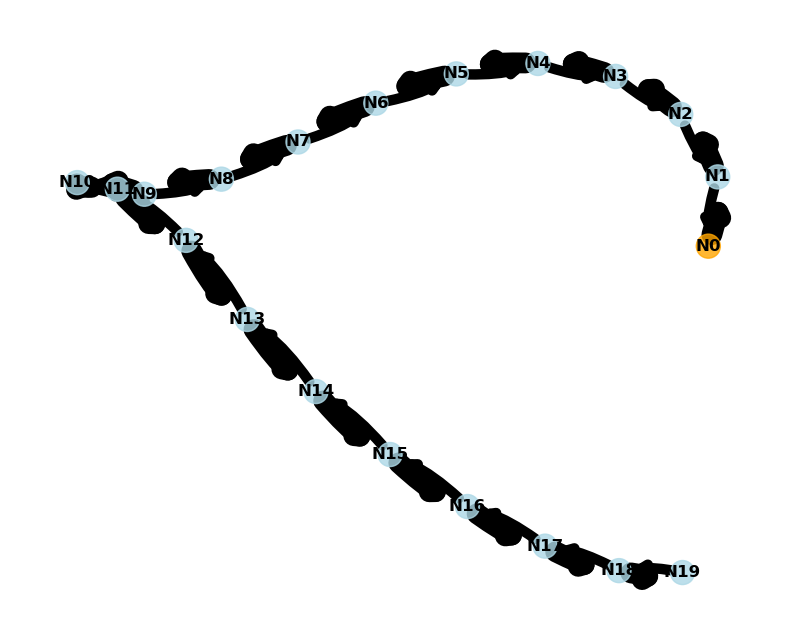

In [26]:
bio_param = {'c_b' : 0.1, 'mu_a' : 0.3, 'nss' : 100, 'delta' : 0.5, 'mu' : 0.07,'gamma_ant':0.30, 'gamma_ret':0.15}
G, VARS, COMP, start_state = linear_network(20, bio_param, start_pop = [1, 0])
plot_network(G)

## Get ODE representation of network, and run simulation

In [27]:
ODE_model = ODE_from_network(G)

> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	N0_wt, N0_mt, N1_wt, N1_mt, N2_wt, N2_mt, N3_wt, N3_mt, N4_wt, N4_mt, N5_wt, N5_mt, N6_wt, N6_mt, N7_wt, N7_mt, N8_wt, N8_mt, N9_wt, N9_mt, N10_wt, N10_mt, N11_wt, N11_mt, N12_wt, N12_mt, N13_wt, N13_mt, N14_wt, N14_mt, N15_wt, N15_mt, N16_wt, N16_mt, N17_wt, N17_mt, N18_wt, N18_mt, N19_wt, N19_mt = z
	return [
		# ΔN0_wt/Δt
		(N0_wt*((0.3 + 0.1*(100-N0_wt-(0.5*N0_mt)))-(0.07)-(0.3)))+(N1_wt*0.15),
		# ΔN0_mt/Δt
		(N0_mt*((0.3 + 0.1*(100-N0_wt-(0.5*N0_mt)))-(0.07)-(0.3)))+(N1_mt*0.15),
		# ΔN1_wt/Δt
		(N1_wt*(0-(0.07)-(0.45)))+(N0_wt*0.3)+(N2_wt*0.15),
		# ΔN1_mt/Δt
		(N1_mt*(0-(0.07)-(0.45)))+(N0_mt*0.3)+(N2_mt*0.15),
		# ΔN2_wt/Δt
		(N2_wt*(0-(0.07)-(0.45)))+(N1_wt*0.3)+(N3_wt*0.15),
		# ΔN2_mt/Δt
		(N2_mt*(0-(0.07)-(0.45)))+(N1_mt*0.3)+(N3_mt*0.15),
		# ΔN3_wt/Δt
		(N3_wt*(0-(0.07)-(0.45)))+(N2_wt*0.3)+(N4_wt*0.15),
		# ΔN3_mt/Δt
		(N3_mt*(0-(0.07)-(0.45)))+(N2_mt*0.3)+(N4_mt*0.15),
		# ΔN

> Final counts of mt and wt in each compartment:
N0_wt	100.3967	
N0_mt	0.0	
N1_wt	73.4014	
N1_mt	0.0	
N2_wt	53.6647	
N2_mt	0.0	
N3_wt	39.235	
N3_mt	0.0	
N4_wt	28.6853	
N4_mt	0.0	
N5_wt	20.9722	
N5_mt	0.0	
N6_wt	15.333	
N6_mt	0.0	
N7_wt	11.2102	
N7_mt	0.0	
N8_wt	8.1959	
N8_mt	0.0	
N9_wt	5.9922	
N9_mt	0.0	
N10_wt	4.381	
N10_mt	0.0	
N11_wt	3.2031	
N11_mt	0.0	
N12_wt	2.3421	
N12_mt	0.0	
N13_wt	1.7131	
N13_mt	0.0	
N14_wt	1.2547	
N14_mt	0.0	
N15_wt	0.9232	
N15_mt	0.0	
N16_wt	0.6911	
N16_mt	0.0	
N17_wt	0.5494	
N17_mt	0.0	
N18_wt	0.5225	
N18_mt	0.0	
N19_wt	0.7125	
N19_mt	0.0	

> Final effective population sizes in each compartment:
N0	100.3967	
N1	73.4014	
N2	53.6647	
N3	39.235	
N4	28.6853	
N5	20.9722	
N6	15.333	
N7	11.2102	
N8	8.1959	
N9	5.9922	
N10	4.381	
N11	3.2031	
N12	2.3421	
N13	1.7131	
N14	1.2547	
N15	0.9232	
N16	0.6911	
N17	0.5494	
N18	0.5225	
N19	0.7125	


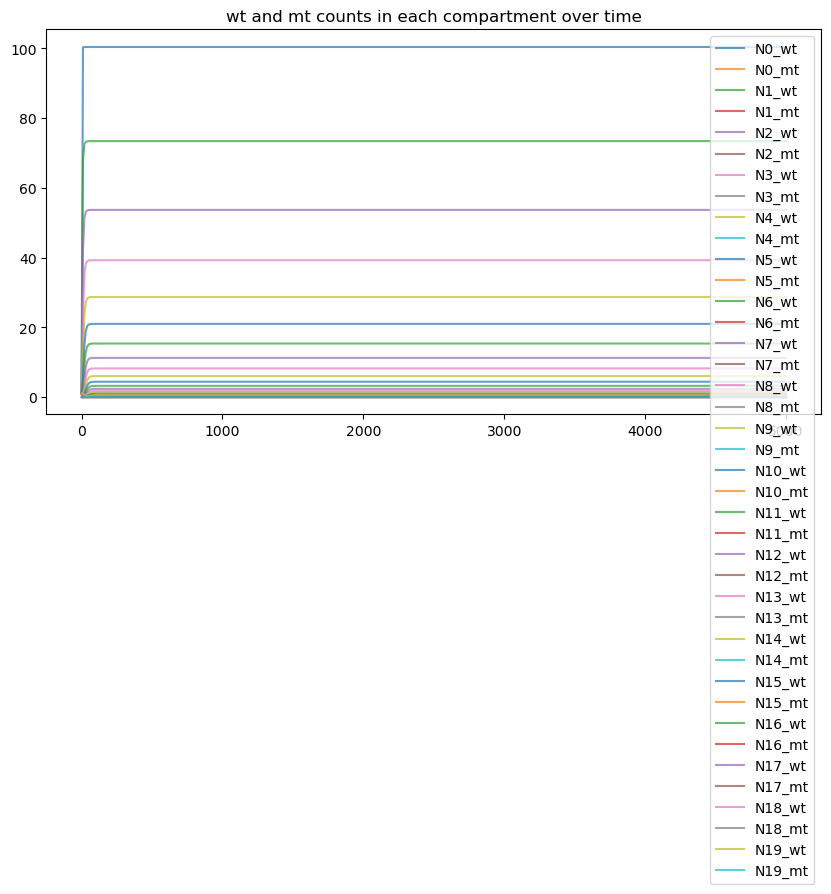

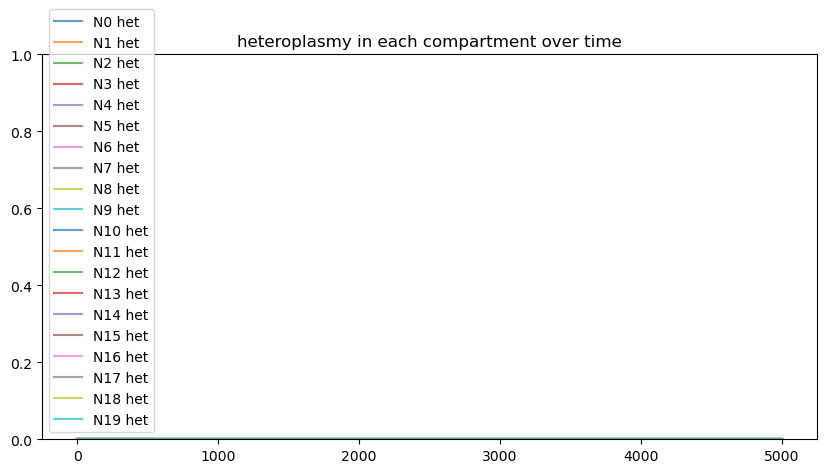

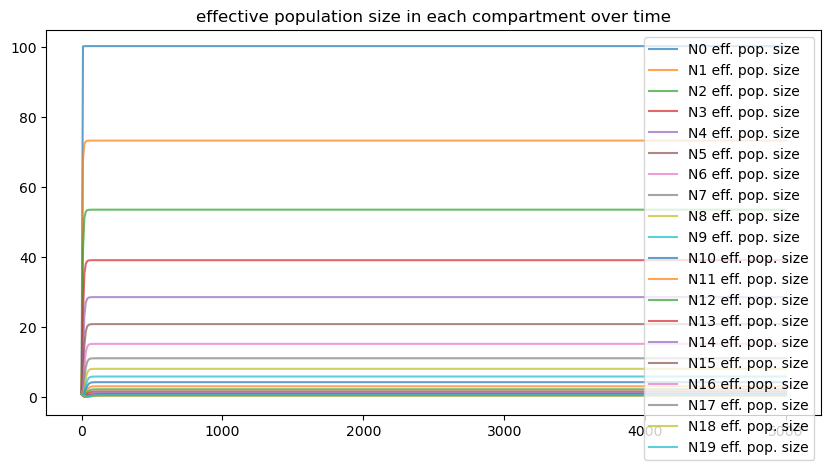

In [28]:
ode_results = ODE_simulate(ODE_model, TIME_POINTS, start_state)
plot_ODE(ode_results, TIME_POINTS, 0.5, VARS, COMP)

## Get gillespie simulation for network

In [8]:
gill_param = gillespie_reaction_dict_from_network(G)

> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	0	death	0.07	[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	1	death	0.07	[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4	2	death	0.07	[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5	3	death	0.07	[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
6	4	death	0.07	[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
7	5	death	0.07	[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
8	6	death	0.07	[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
9	7	death	0.07	[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
10	8	death	0.07	[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
11	9	death	0.07	[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0]
12	10	death	0.07	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
13	11	death	0.07	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
14	0	trnspt	0.28	[-1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
15	1	trnspt	0.28	[0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
16	2	trnspt	0.14	[1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
17	3	trnspt	0.14	[0, 1, 0, -1, 0, 0, 

In [9]:
#gill_results = GILL_simulate(gill_param, TIME_POINTS, start_state, replicates=2000, onedynamic = True)

In [10]:
#plot_gillespie(gill_results, TIME_POINTS, 0.5, VARS, COMP)